In [151]:
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch
import RunManager as rm
import RunBuilder as bm
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
import time as time
from collections import OrderedDict
from collections import namedtuple
from itertools import product
import torchvision
import torchvision.transforms as transforms

In [152]:
#CNN Network

class Down(nn.Module):
    def __init__(self, in_channels, out_channels, device = "cuda"):
        super().__init__()
        self.device = torch.device(device)
        self.out_channels = out_channels  # Store out_channels as an instance variable
        conv1_out_channels = (out_channels + in_channels) // 2
        
        self.conv1 = nn.Conv2d(in_channels, conv1_out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(conv1_out_channels, out_channels, kernel_size=3, padding=1)

        # Initialize fc1 later
        self.fc1 = None  # Initialize later based on input size
        self.fc2 = nn.Linear(out_channels, 200)  # Adjust output size if needed
        self.fc3 = nn.Linear(200, 100)
        self.out = nn.Linear(100, 10)  # The input size must match the output of fc2

    def forward(self, t):
        t = F.max_pool2d(t, kernel_size=3, stride=2, padding=1)
        #print(t.shape)
        t = self.conv1(t)
        #print(t.shape)
        t = F.relu(t)
        t = self.conv2(t)
        #print(t.shape)
        t = F.relu(t)

        # Flatten the tensor for fully connected layers
        t = t.view(t.size(0), -1)
        if self.fc1 is None:
            self.fc1 = nn.Linear(t.size(1), self.out_channels).to(self.device)

        # Dynamically set the first linear layer based on the flattened size

        t = self.fc1(t)
        #print(t.shape, "fc1")
        t = F.relu(t)
        t = self.fc2(t)
        #print(t.shape, "fc2")
        t = F.relu(t)
        t = self.fc3(t)
        #print(t.shape, "fc1")
        t = F.relu(t)
        t = self.out(t)
        #print(t.shape, "out")
        return t


In [153]:
# Random data example usage
#network = Down(1, 5).to("cuda")
#real_samples_labels = torch.randint(0, 100, (1, 1, 32, 32), #dtype=torch.float32).to("cuda")
#out = network(real_samples_labels)
##print(out.shape)  # Should output: torch.Size([1, 10])

#plt.imshow(out[:,:].detach().cpu().numpy())  # get the graph

In [154]:
#Download FMNIST data
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()]))

In [155]:
#sample = next(iter(train_set))
#image, label = sample # returns a sample, which can be split in to an image and a label
#plt.imshow(image.squeeze())

In [156]:
#first run test
#train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)
#sample = next(iter(train_loader))
#image, label = sample
#print(image.shape)
#print(label)
#
#batch = next(iter(train_loader))
#images, labels = batch
#images, labels = images.to("cuda"), labels.to("cuda")
#network = Down(in_channels=1, out_channels=100).to("cuda")
#preds = network(images)
#print(np.max(preds.detach().numpy(),axis=0))
#print(preds)
#print(labels)

In [157]:
##first fun test
#def get_num_correct(preds, labels):
#    return preds.argmax(dim=1).eq(labels).sum().item()
#
#hold = []
#for I in range(100):
#    batch = next(iter(train_loader))
#    images, labels = batch
#    images, labels = images.to("cuda"), labels.to("cuda")
#    preds = network(images)
#    hold.append(get_num_correct(preds, labels))

In [158]:
#plt.plot(hold)
#print(np.mean(hold))

In [159]:
#train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)
#sample = next(iter(train_loader))
#image, label = sample
##print(image.shape)
##print(label)#
#
#def get_num_correct(preds, labels):
#    return preds.argmax(dim=1).eq(labels).sum().item()#
#
#device = torch.device("cuda")
#network = Down(1, 16).to("cuda")

#batch = next(iter(train_loader))
#images, labels = batch
#images, labels = images.to(device), labels.to(device)

#number_run = 100
#holdall = np.zeros(number_run)
#
#optimizer = optim.Adam(network.parameters(), lr=0.01)#, weight_decay=1e-5)#
#
#for I in range(number_run):
#    preds = network(images)
#    loss = F.cross_entropy(preds, labels)
#    holdall[I] = get_num_correct(preds.to('cuda'), labels.to('cuda'))
#    loss.backward() # Calculating the gradients
#    #optimizer = optim.Adam(network.parameters(), lr=0.001)
#    optimizer.step()
#    optimizer.zero_grad()
#plt.plot(holdall)
#plt.show()
#max_value = holdall.max()
#print(max_value)

In [160]:
#training on repeat
#histogram = []
#
#for I in range(100):
#    train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)
#    sample = next(iter(train_loader))
#    image, label = sample
#    #print(image.shape)
#    #print(label)#
#
#    def get_num_correct(preds, labels):
#        return preds.argmax(dim=1).eq(labels).sum().item()#
#
#    device = torch.device("cuda")
#    network = Down(1, 16).to("cuda")#
#
#    batch = next(iter(train_loader))
#    images, labels = batch
#    images, labels = images.to(device), labels.to(device)#
#
#    number_run = 500
#    holdall = np.zeros(number_run)#
#
#    optimizer = optim.Adam(network.parameters(), lr=0.01)#, weight_decay=1e-5)##
#
#    for I in range(number_run):
#        preds = network(images)
#        loss = F.cross_entropy(preds, labels)
#        holdall[I] = get_num_correct(preds.to('cuda'), labels.to('cuda'))
#        loss.backward() # Calculating the gradients
#        #optimizer = optim.Adam(network.parameters(), lr=0.001)
#        optimizer.step()
#        optimizer.zero_grad()#
#
    #plt.plot(holdall)
    #plt.show()
    #print(max(holdall))

#    histogram.append(max(holdall))
#
#plt.hist(histogram)
#plt.xlabel('Number of correct guesses out of 1000')
#plt.ylabel('Frequency (totaling 100)')
#plt.title("Histogram of the accuracy of the network for 1000 images for 500 runs")
#plt.show()

In [161]:
#run builder and run manager
class RunBuilder():
    @staticmethod
    def get_runs(params):
        Run = namedtuple('Run', params.keys())
        runs = []
        for v in product(*params.values()):
            runs.append(Run(*v))
        return runs

#run manager
class RunManager():
    def __init__(self):

        self.epoch_count = 0
        self.epoch_loss = 0
        self.epoch_num_correct = 0
        self.epoch_start_time = None

        self.run_params = None
        self.run_count = 0
        self.run_data = []
        self.run_start_time = None

        self.network = None
        self.loader = None
        self.tb = None

    def begin_run(self, run, network, loader):
        self.run_start_time = time.time()
        self.run_params = run
        self.run_count += 1
        self.network = network
        self.loader = loader
        self.tb = SummaryWriter(comment=f'-{run}')
        characteristics, labels = next(iter(self.loader))

    def end_run(self):
        self.tb.close()
        self.epoch_count = 0

    def begin_epoch(self):
        self.epoch_start_time = time.time()
        self.epoch_count += 1
        self.epoch_loss = 0
        self.epoch_num_correct = 0

    def end_epoch(self):
        epoch_duration = time.time() - self.epoch_start_time
        run_duration = time.time() - self.run_start_time

        loss = self.epoch_loss / len(self.loader.dataset)
        accuracy = self.epoch_num_correct / len(self.loader.dataset)

        self.tb.add_scalar('Loss', loss, self.epoch_count)
        self.tb.add_scalar('Accuracy', accuracy, self.epoch_count)

    def _get_num_correct(self, preds, labels):
        return preds.argmax(dim=1).eq(labels).sum().item()

    def track_loss(self, loss, batch):
        self.epoch_loss += loss.item() * batch[0].shape[0]

    def track_num_correct(self, preds, labels):
        self.epoch_num_correct += self._get_num_correct(preds, labels)

    def inform(self, discrete_n):
        if self.epoch_count % discrete_n == 0:
            print(self.epoch_count, ' ', self.run_count)

In [162]:
#train manager builder

def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

def sanitize_for_windows_path(name):
    # Replace invalid characters with underscores or remove them
    invalid_chars = r'<>:"/\\|?*'
    return ''.join('_' if c in invalid_chars else c for c in name)

#train_loader = torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=True, pin_memory=True)

params = OrderedDict(lr=[0.0151], batch_size=[36], number_epocs=[1], op=[torch.optim.AdamW])

m = rm.RunManager()
b = bm.RunBuilder.get_runs(params)

for run in b:
    print(run)

Run(lr=0.0151, batch_size=36, number_epocs=1, op=<class 'torch.optim.adamw.AdamW'>)


In [163]:
#train manager
network = Down(1, 16).to("cuda")
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

def calculate_correct(out, labels):
    return torch.eq(out.argmax(dim=1), labels).sum().numpy()

#rounding to 3sfd function
#def round_to_sig_figs(num, sig_figs):
#    if num == 0:
#        return 0
#    from math import log10, floor
#    return round(num, sig_figs - int(floor(log10(abs(num)))) - 1)

#time42 = []
max1 = []

for run in b:
    #u_u = time.time()
    network = Down(1, 16).to("cuda")
    loader = DataLoader(train_set, batch_size=run.batch_size, shuffle=True)
    optimizer = run.op(network.parameters(), lr=run.lr)
    sanitized_run = sanitize_for_windows_path(str(run))    # Sanitize run name before calling m.begin_run
    m.begin_run(sanitized_run, network, loader)

    for epoch in range(run.number_epocs):
        list = []
        m.begin_epoch()
        for batch in train_loader:
            characteristics, labels = batch
            characteristics, labels = characteristics.to("cuda"), labels.to("cuda")
            preds = network(characteristics)  # Pass Batch
            loss = F.cross_entropy(preds, labels)  # Calculate Loss
            optimizer.zero_grad()  # Zero Gradients
            loss.backward()  # Calculate Gradients
            optimizer.step()  # Update Weights
            m.track_loss(loss, batch)
            m.track_num_correct(preds, labels)
        m.end_epoch()

        f = m.epoch_num_correct / len(train_loader.dataset)
        list.append(f)
        #print(f"Epoch {epoch + 1}/{run.number_epocs}, Loss: {m.epoch_loss}, Accuracy: {m.epoch_num_correct / len(train_loader.dataset):.4f}")
    #maxy = round_to_sig_figs(np.max(list), 3)
    maxy = np.max(list)
    print(run, "," , "Accuracy = ", maxy)
    max1.append(maxy)
    #I = time.time()
    #time42.append(I - u_u)
    #print("Average time", np.average(time42))
    
print("Maximum accuracy run at row:", np.argmax(max1)+1,".)", np.max(max1))

Run(lr=0.0151, batch_size=36, number_epocs=1, op=<class 'torch.optim.adamw.AdamW'>) , Accuracy =  0.7206833333333333
Maximum accuracy run at row: 1 .) 0.7206833333333333


In [171]:
#saving the CNN network 
torch.save(network, 'network.pth')
help_me = torch.load('network.pth', weights_only = False).to("cuda:0")#, weights_only = True)
help_me.eval()  # Set to evaluation mode

Down(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc2): Linear(in_features=16, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=10, bias=True)
  (fc1): Linear(in_features=3136, out_features=16, bias=True)
)

0


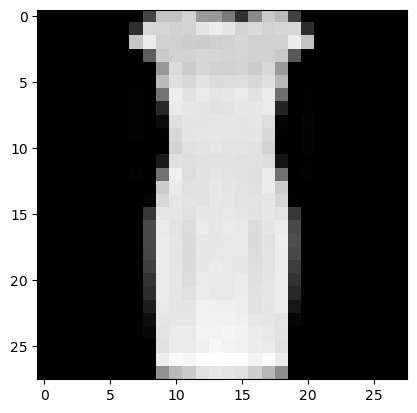

In [177]:
#testing the trained model
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)
sample = next(iter(train_loader))
image, label = sample

image, labels = image.to("cuda:0"), labels.to("cuda:0")
image = image.to("cuda")

images = image[0].unsqueeze(0)  # From [16, 14, 14] to [1, 16, 14, 14]
labels = labels[0].unsqueeze(0)

# Plot the first channel of the image
plt.imshow(images[0, 0].cpu().numpy(), cmap='gray')  # Visualize the first channel

# Pass through the network
preds = help_me(images)  # Input shape: [1, 16, 14, 14]

def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()
holdall = get_num_correct(preds.to('cuda'), labels.to('cuda'))

#print to check
print(holdall)
#print(preds.shape, labels.shape)